In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [3]:
def semicircle_contour(radius, resolution = 100, ax = None):
    if ax is None:
        ax = plt.gca()
    # Real axis segment
    x_real = np.linspace(-radius, radius, 2*resolution)
    y_real = np.zeros_like(x_real)

    # Semicircle in lower half-plane
    theta = np.linspace(0, -np.pi, int(np.pi*resolution))
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)

    # Combine contour segments
    x_contour = np.concatenate([x_real, x_circle])
    y_contour = np.concatenate([y_real, y_circle])
    # Plot contour
    ax.plot(x_contour, y_contour, color='blue', lw=2, label='Contour')

    # Add arrows along contour
    for i in range(int(resolution*0.7), len(x_contour)-1, int(resolution*0.8)):
        arrow = FancyArrowPatch((x_contour[i], y_contour[i]), (x_contour[i+1], y_contour[i+1]),
                            arrowstyle='-|>', mutation_scale=15, color='blue')
        ax.add_patch(arrow)

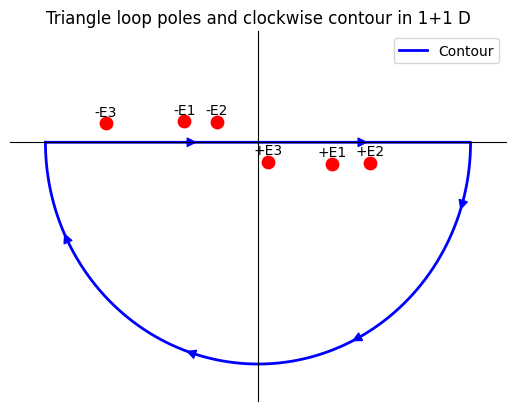

In [4]:
m = 1.0
epsilon = 0.6
p0, px = 1.0, 0.5
q0, qx = 0.5, -0.3
k_x = 0.0  # fixed loop spatial momentum

# Helper: energy sqrt(k^2 + m^2 - i*epsilon)
def E(k, m, eps):
    return np.sqrt(k**2 + m**2 - 1j*eps)

# Compute poles
poles = []
labels = []

w1 = E(k_x, m, epsilon)
poles += [w1, -w1]
labels += ["+E1", "-E1"]

w2 = E(k_x - qx, m, epsilon)
poles += [q0 + w2, q0 - w2]
labels += ["+E2", "-E2"]

w3 = E(k_x + px, m, epsilon)
poles += [-p0 + w3, -p0 - w3]
labels += ["+E3", "-E3"]

real_parts = [z.real for z in poles]
imag_parts = [z.imag for z in poles]

plt.scatter(real_parts, imag_parts, color='red', s=80)

# Pole labels
for z, lbl in zip(poles, labels):
    plt.text(z.real, z.imag + 0.1, lbl, ha='center')

semicircle_contour(3)

plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['right'].set_color('none')

plt.xlim(-3.5,3.5)
plt.ylim(-3.5,1.5)
plt.xticks([])
plt.yticks([])
plt.title('Triangle loop poles and clockwise contour in 1+1 D')
plt.legend()
plt.show()


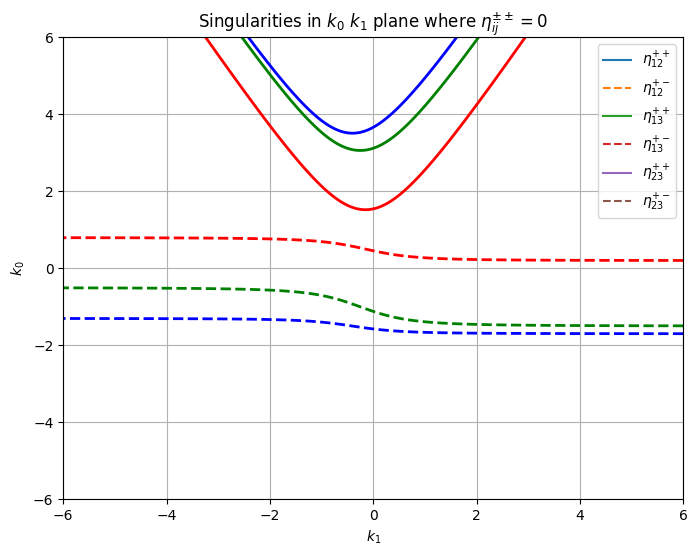

In [5]:
# Parameters
m = 1.0
p0, px = 1.0, 0.5
q0, qx = 0.5, -0.3

# Grid in k0 and k1
k0 = np.linspace(-6, 6, 400)
k1 = np.linspace(-6, 6, 400)
K0, K1 = np.meshgrid(k0, k1)

# Energies as functions of k1
E1 = np.sqrt(K1**2 + m**2)
E2 = np.sqrt((K1 - qx)**2 + m**2)
E3 = np.sqrt((K1 + px)**2 + m**2)

# Delta q0 shifts
delta_q12 = 0 - q0
delta_q13 = 0 - (-p0)
delta_q23 = q0 - (-p0)

# Compute eta coefficients in k0-k1 plane
eta12_pp = K0 - (E1 + E2 + delta_q12)
eta12_pm = K0 - (E1 - E2 - delta_q12)

eta13_pp = K0 - (E1 + E3 + delta_q13)
eta13_pm = K0 - (E1 - E3 - delta_q13)

eta23_pp = K0 - (E2 + E3 + delta_q23)
eta23_pm = K0 - (E2 - E3 - delta_q23)

# Plot contour lines where eta=0 (singularities)
plt.figure(figsize=(8,6))
contours = [
    (eta12_pp, 'r','-', r'$\eta_{12}^{++}$'),
    (eta12_pm, 'r','--', r'$\eta_{12}^{+-}$'),
    (eta13_pp, 'g','-', r'$\eta_{13}^{++}$'),
    (eta13_pm, 'g','--', r'$\eta_{13}^{+-}$'),
    (eta23_pp, 'b','-', r'$\eta_{23}^{++}$'),
    (eta23_pm, 'b','--', r'$\eta_{23}^{+-}$')
]

for eta, color,style, label in contours:
    plt.contour(K1, K0, eta, levels=[0], colors=color, linestyles = style, linewidths=2)
    # Optional: add label in legend
    plt.plot([], [], style, label=label)

plt.xlabel(r'$k_1$')
plt.ylabel(r'$k_0$')
plt.title(r'Singularities in $k_0$ $k_1$ plane where $\eta_{ij}^{\pm\pm}=0$')
plt.grid(True)
plt.legend()
plt.show()
